<a href="https://colab.research.google.com/github/DarkNacho/UTAL_MachineLearning2022-2/blob/main/tarea_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

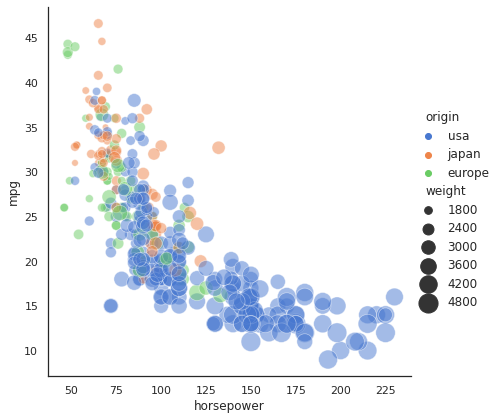

In [3]:
import seaborn as sns
sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=mpg)

Verificación de datos

In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
#Remplazando los valores nulos
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace = True)
mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

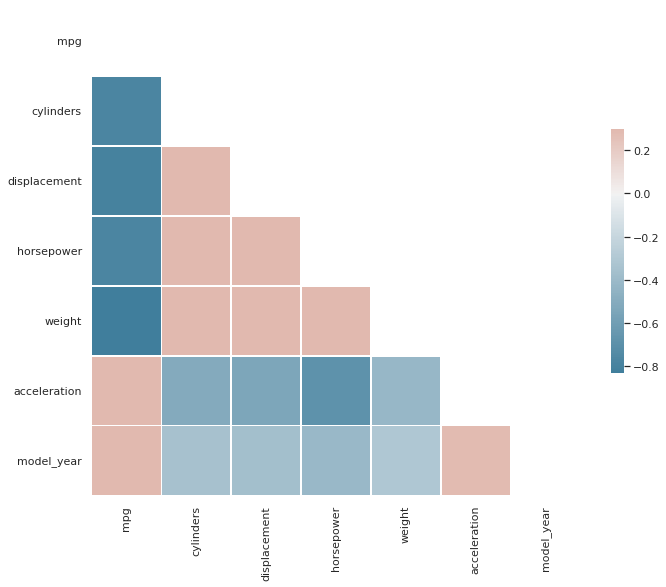

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = mpg.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

3) (1 punto) Construir y entrenar un modelo de regresion lineal


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = mpg.drop(columns=['mpg','name','origin'])
Y =mpg['mpg']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.25)

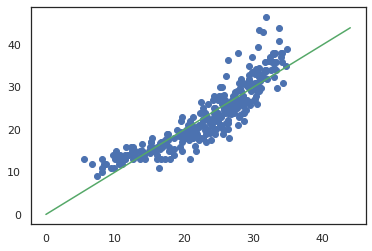

In [9]:
model = LinearRegression()
model.fit(x_train,y_train)
LinerReg = model.predict(x_train)
LinerReg = LinerReg.flatten()
f,ax=plt.subplots()
ax.scatter(LinerReg,y_train)
plt.plot(np.arange(0,45),np.arange(0,45),color='g')
plt.show()

4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [21]:
 print("Desempeño del modelo: ", model.score(x_test,y_test)*100, "%")
 

Desempeño del modelo:  81.73915470040194 %


In [20]:
predictions = model.predict(x_test)
data = pd.DataFrame({"data": y_test, "predicted": predictions})
data

,data,predicted
56,26.0,26.384090
353,33.0,31.929977
263,17.7,21.589274
9,15.0,12.975648
223,15.5,16.147614
...,...,...
269,30.9,29.455078
358,31.6,29.405265
305,28.4,27.738050
396,28.0,30.241565


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.


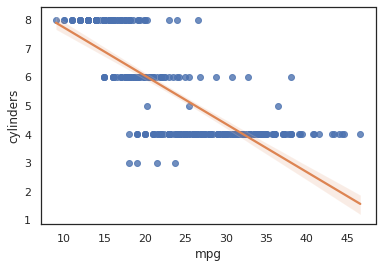

In [11]:
sns.regplot(x="mpg", y="cylinders", data=mpg, line_kws={"color": "C1"});

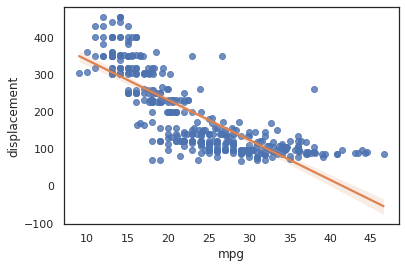

In [12]:
sns.regplot(x="mpg", y="displacement", data=mpg, line_kws={"color": "C1"});

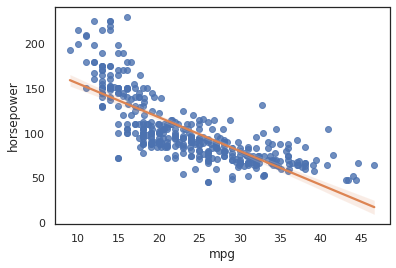

In [13]:
sns.regplot(x="mpg", y="horsepower", data=mpg, line_kws={"color": "C1"});

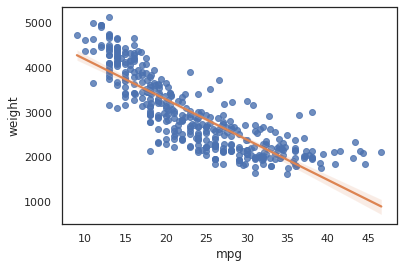

In [14]:
sns.regplot(x="mpg", y="weight", data=mpg, line_kws={"color": "C1"});

6) (1 punto) [Guardar el Jupyter notebook resultante en su cuenta propia de Github ](https://bebi103a.github.io/lessons/02/git_with_colab.html) y compartir el enlace en la pagina de la tarea en Educandus.